In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/DATS 6313 - Final Project'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.tsa.stattools import kpss
from tabulate import tabulate 
from sklearn.model_selection import train_test_split
import seaborn as sns
from numpy import linalg as la
from sklearn import preprocessing
import statsmodels.api as sm
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from scipy.stats import chi2


# Data Description

## Read the Data

In [ ]:
df=pd.read_csv(abspath_curr + '/data/SeoulBikeData.csv', header=0)

## Inspect the Data

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

### **Description of independent variable (Numerical variables)**

In [ ]:
df.drop(columns=['Rented Bike Count']).describe()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Description of independent variable (Categorical)

In [ ]:
df['Date'].describe()

count           8760
unique           365
top       01/12/2017
freq              24
Name: Date, dtype: object

In [ ]:
df['Seasons'].describe()

count       8760
unique         4
top       Spring
freq        2208
Name: Seasons, dtype: object

In [ ]:
df['Holiday'].describe()

count           8760
unique             2
top       No Holiday
freq            8328
Name: Holiday, dtype: object

In [ ]:
df['Functioning Day'].describe()

count     8760
unique       2
top        Yes
freq      8465
Name: Functioning Day, dtype: object

### **Description of Dependent variable**

In [ ]:
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

## Data Pre-processing

### Create Datetime Column

In [ ]:
df_clean=df.copy()

In [ ]:
df_clean['Date']=df_clean['Date'].astype(str)
df_clean['Hour']=df_clean['Hour']*100
df_clean.loc[:,'Hour(str)']=df_clean['Hour'].map('{:04d}'.format).astype(str)
df_clean['datetime']=df_clean['Date']+df_clean['Hour(str)']
df_clean['datetime']=pd.to_datetime(df_clean['datetime'],format='%d/%m/%Y%H%M')


### Set Datetime as index

In [ ]:
data_clean=df_clean.set_index('datetime').drop(columns=['Date','Hour','Hour(str)'])

### Encoding Categorical Vairiables

**Converting 'Holiday' and 'Functioning Day' to binary values**

In [ ]:
data_tf=data_clean.copy()
data_tf['Holiday']=data_clean['Holiday'].replace({'Holiday':1,'No Holiday':0})
data_tf['Functioning Day']=data_clean['Functioning Day'].replace({'Yes':1,'No':0})


**Converting 'Seasons' to dummy variables**

In [ ]:
data_tf=pd.get_dummies(data=data_tf,columns=['Seasons'])
data=data_tf

## Plot Rented Bike Count vs. Time

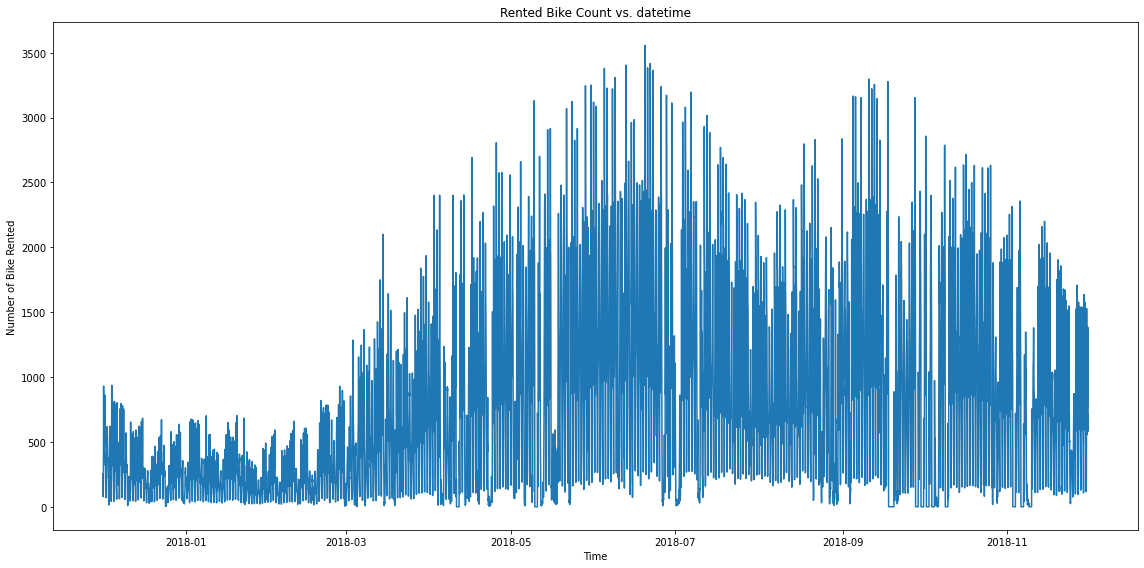

In [ ]:
rent=data['Rented Bike Count']
plt.figure(figsize=(16,8))
plt.plot(rent)
plt.title('Rented Bike Count vs. datetime')
plt.xlabel('Time')
plt.ylabel('Number of Bike Rented')
plt.tight_layout()
plt.show()

## ACF and PACF for Rent 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


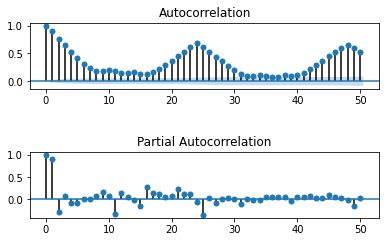

In [ ]:
def ACF_PACF_Plot(y,lags):
    acf = sm.tsa.stattools.acf(y, nlags=lags)
    pacf = sm.tsa.stattools.pacf(y, nlags=lags)
    fig = plt.figure()
    plt.subplot(211)
    plt.title('ACF/PACF of the raw data')
    plot_acf(y, ax=plt.gca(), lags=lags)
    plt.subplot(212)
    plot_pacf(y, ax=plt.gca(), lags=lags)
    fig.tight_layout(pad=3)
    plt.show()
ACF_PACF_Plot(rent,50)

## Correlation Matrix

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

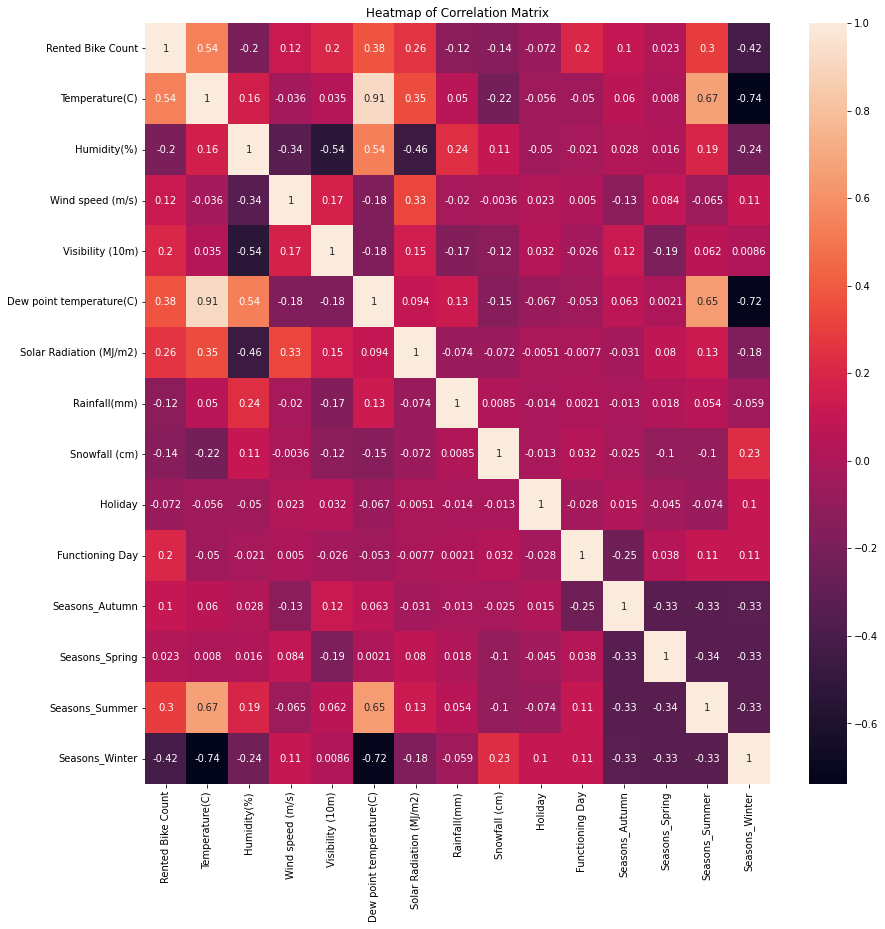

In [ ]:
plt.figure(figsize=(14,14))
corr_mat=data.corr()
sns.heatmap(corr_mat,annot=True)
plt.title('Heatmap of Correlation Matrix')

## Train Test Split

In [ ]:
y=data['Rented Bike Count']
x=data.drop(columns=['Rented Bike Count'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12,shuffle=False)


In [ ]:
x_train.head()

,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
datetime,,,,,,,,,,,,,,
2017-12-01 00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2017-12-01 01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2017-12-01 02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
2017-12-01 03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2017-12-01 04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1


In [ ]:
x_test.head()

,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
datetime,,,,,,,,,,,,,,
2018-09-19 00:00:00,21.0,66,0.4,2000,14.3,0.0,0.0,0.0,0,0,1,0,0,0
2018-09-19 01:00:00,20.5,64,0.4,2000,13.4,0.0,0.0,0.0,0,0,1,0,0,0
2018-09-19 02:00:00,20.0,70,0.2,2000,14.3,0.0,0.0,0.0,0,0,1,0,0,0
2018-09-19 03:00:00,19.7,70,0.5,2000,14.0,0.0,0.0,0.0,0,0,1,0,0,0
2018-09-19 04:00:00,19.5,70,0.5,2000,13.8,0.0,0.0,0.0,0,0,1,0,0,0


# Check for stationarity

## ACF and PACF Analysis

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


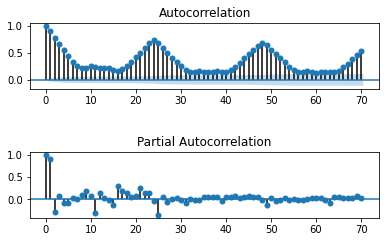

In [ ]:
ACF_PACF_Plot(y_train,70)

## ADF Test for Rent

In [ ]:
def display_adf_result(y):
    adf_result=ADF(y)
    print("ADF Statistics:",round(adf_result[0],6))
    print("P-value:",round(adf_result[1],6))
    print("Critical Values:")
    for k,v in adf_result[4].items():
        print("  ",k,":",round(v,3))
display_adf_result(y_train)


ADF Statistics: -6.198709
P-value: 0.0
Critical Values:
   1% : -3.431
   5% : -2.862
   10% : -2.567


## KPSS Test for Rent

In [ ]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='ct', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','LagsUsed'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(y_train)

Results of KPSS Test:
Test Statistic            1.176675
p-value                   0.010000
LagsUsed                 37.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Rolling mean and Rolling variance for Rent

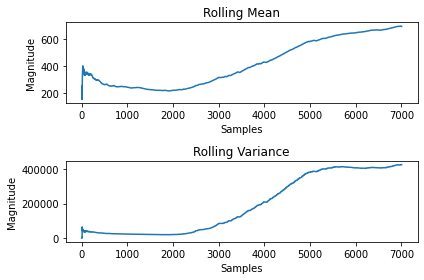

In [ ]:
def plot_rolling_mean_var(y):
    mean_r=[]
    var_r=[]
    for i in range(1,len(y)+1):
        mean_r.append(np.mean(y[:i]))
        var_r.append(np.var(y[:i]))
    plt.subplot(2,1,1)
    plt.plot(mean_r)
    plt.xlabel("Samples")
    plt.ylabel("Magnitude")
    plt.title("Rolling Mean")
    plt.subplot(2,1,2)
    plt.plot(var_r)
    plt.xlabel("Samples")
    plt.ylabel("Magnitude")
    plt.title("Rolling Variance")
    plt.tight_layout()
    plt.show()

plot_rolling_mean_var(y_train)

**KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.**

## Make the Data Stationary

### Take the first order differencing of the data

In [ ]:
y_diff1=y_train.diff(periods=1)[1:]

### Check for stationarity of differenced data

**ACF and PACF Analysis on differenced data**

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


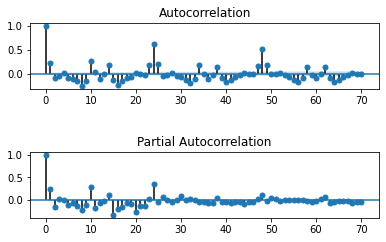

In [ ]:
ACF_PACF_Plot(y_diff1,70)

**Perform ADF test on differenced data**

In [ ]:
display_adf_result(y_diff1)

ADF Statistics: -18.873579
P-value: 0.0
Critical Values:
   1% : -3.431
   5% : -2.862
   10% : -2.567


**Perform KPSS test on differenced data**

In [ ]:
kpss_test(y_diff1)

Results of KPSS Test:
Test Statistic            0.01839
p-value                   0.10000
LagsUsed                 97.00000
Critical Value (10%)      0.11900
Critical Value (5%)       0.14600
Critical Value (2.5%)     0.17600
Critical Value (1%)       0.21600
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**Plot Rolling mean and Rollong variance for differeced data**

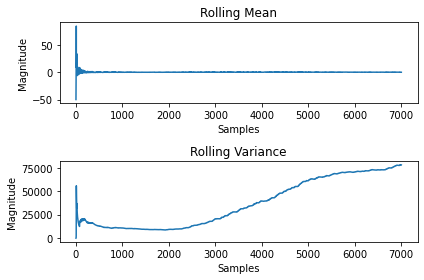

In [ ]:
plot_rolling_mean_var(y_diff1)

# Time Series Decomposition

## Decomposition using STL

<Figure size 2304x2304 with 0 Axes>

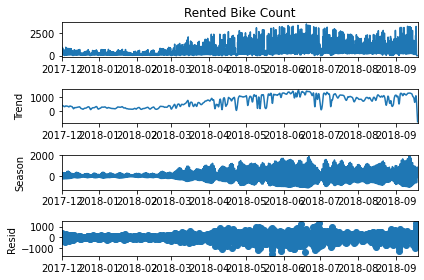

In [ ]:
from statsmodels.tsa.seasonal import STL
STL=STL(y_train)
plt.figure(figsize=(32,32))
res=STL.fit()
fig=res.plot()
plt.tight_layout()
plt.show()

T = res.trend
S = res.seasonal
R = res.resid

## Calculate Strength of Trend and Seasonality

In [ ]:
def cal_strength(T,S,R):
    F=np.maximum(0,1-np.var(np.array(R))/np.var(np.array(T+R)))
    Fs=np.maximum(0,1-np.var(np.array(R))/np.var(np.array(S+R)))

    print(f'The strength of trend for this data set is {100*F:.2f}%')
    print(f'The strength of seasonality for this data set is {100 * Fs:.2f}%')
cal_strength(T,S,R)

The strength of trend for this data set is 83.56%
The strength of seasonality for this data set is 82.97%


## Plot Seasonally Adjusted Data

### Additive Decomposition

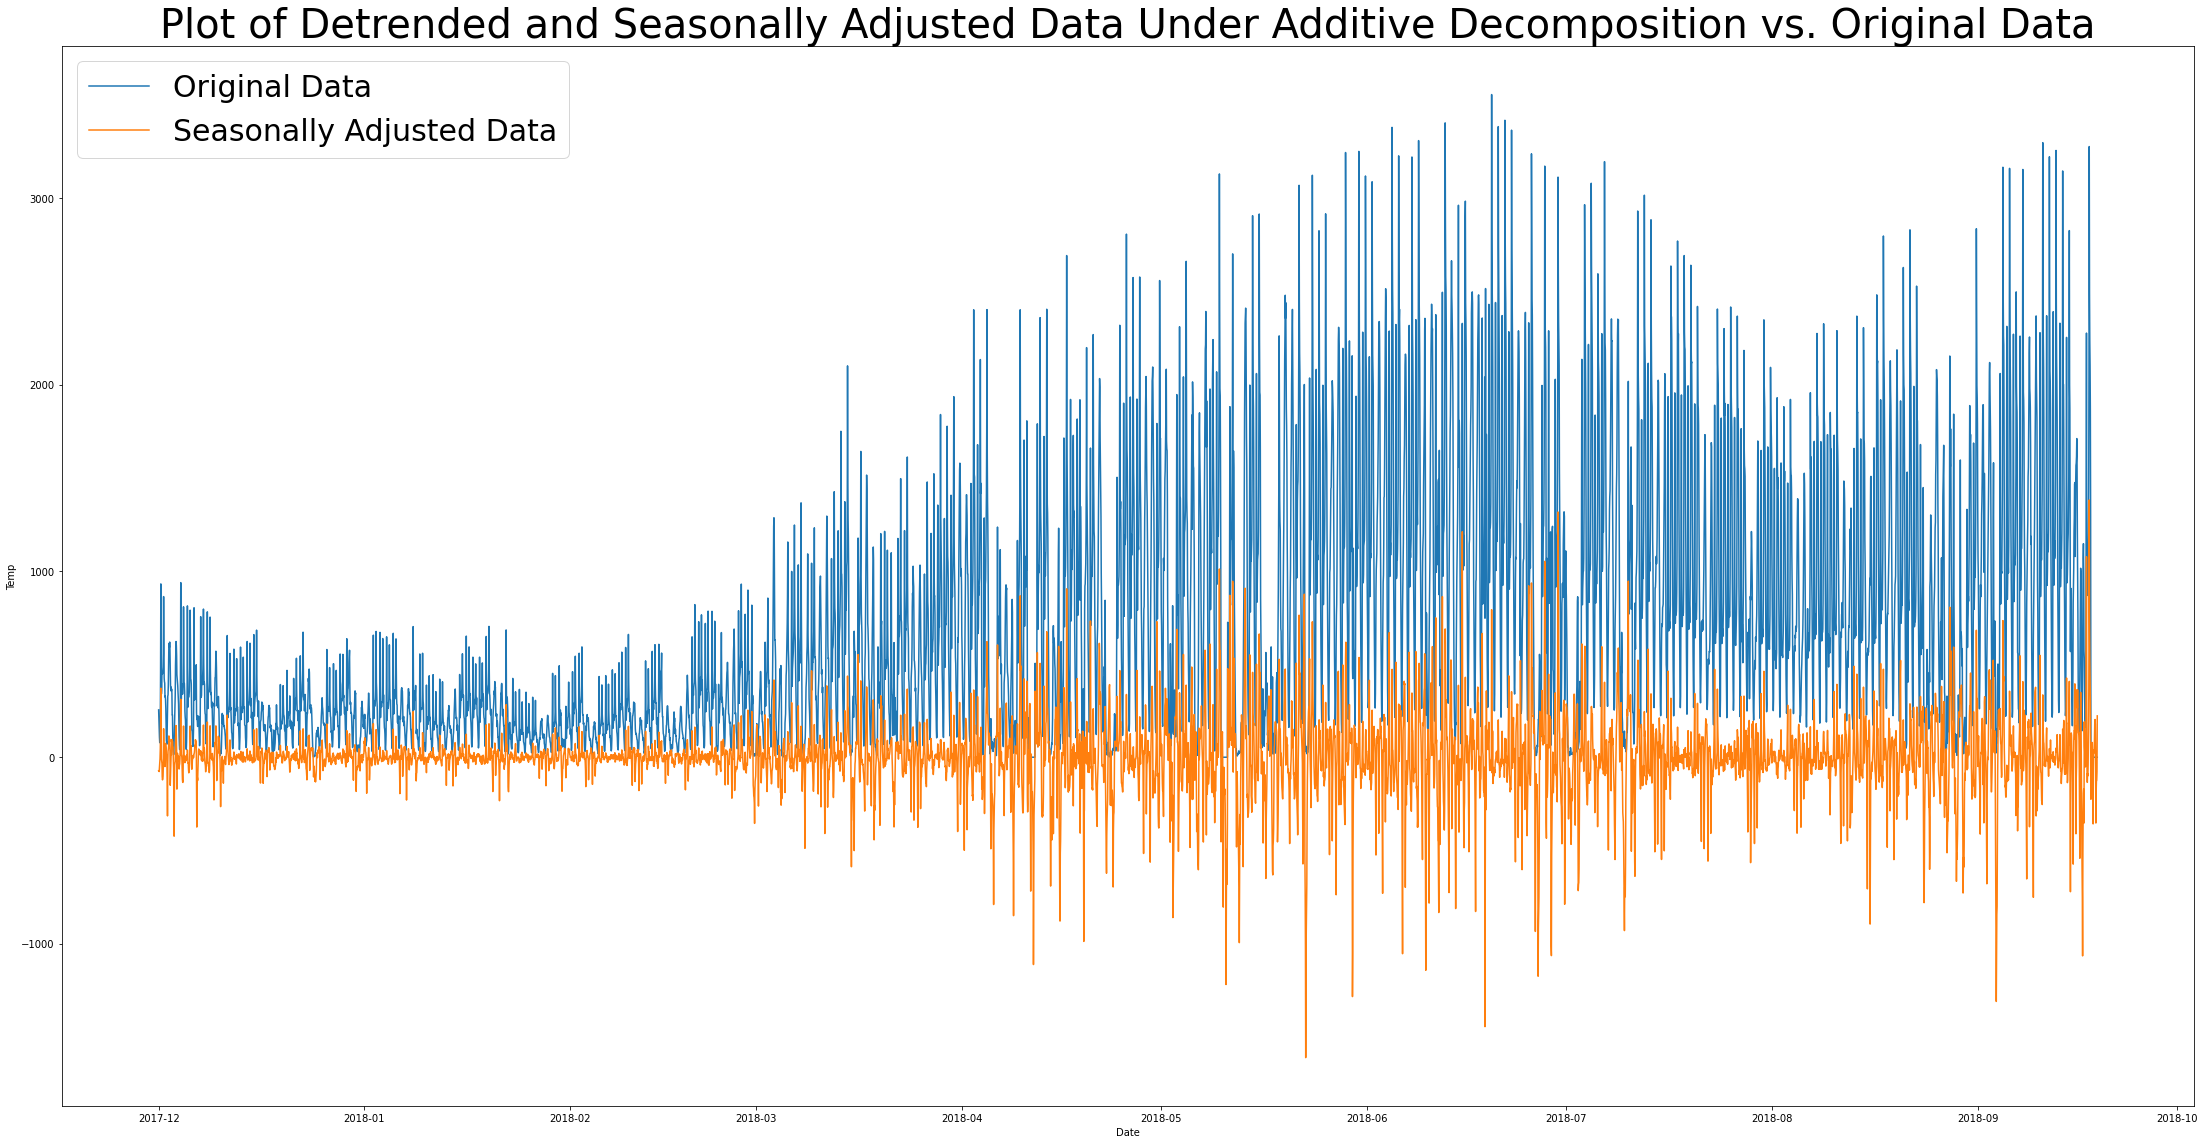

In [ ]:
plt.figure(figsize=(32,16))
adj_y_add=y_train-S-T
plt.plot(y_train,label="Original Data")
plt.plot(adj_y_add,label="Seasonally Adjusted Data")
plt.title("Plot of Detrended and Seasonally Adjusted Data Under Additive Decomposition vs. Original Data",fontsize=40)
plt.legend(prop={'size':30})
plt.xlabel("Date")
plt.ylabel("Temp")
plt.tight_layout()
plt.show()

### Multiplicative Decomposition

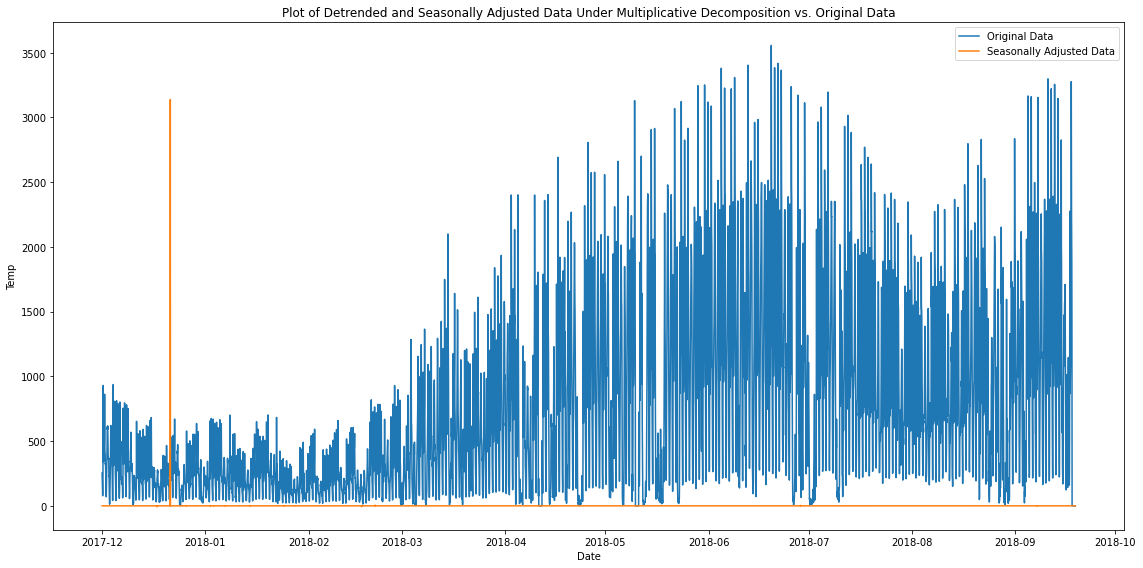

In [ ]:
adj_y_mul=y_train/S/T
plt.figure(figsize=(16,8))
plt.plot(y_train,label="Original Data")
plt.plot(adj_y_mul,label="Seasonally Adjusted Data")
plt.title("Plot of Detrended and Seasonally Adjusted Data Under Multiplicative Decomposition vs. Original Data")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temp")
plt.tight_layout()
plt.show()

# Holt-Winters Method

## Using Default heurisitic method 

### Fit the model

<ipython-input-36-95dfedd43d23>:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  holtt=ets.ExponentialSmoothing(y_train,trend="add", seasonal = "add",initialization_method='heuristic',damped=True).fit()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


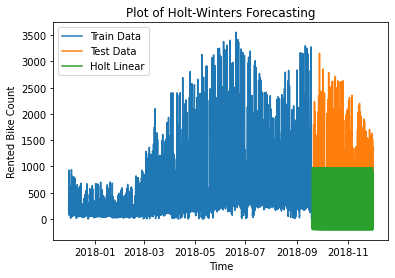

In [ ]:
import statsmodels.tsa.holtwinters as ets
holtt=ets.ExponentialSmoothing(y_train,trend="add", seasonal = "add",initialization_method='heuristic',damped=True).fit()
#holtt=ets.ExponentialSmoothing(y_diff1).fit()
holtf=holtt.forecast(steps = len(y_test))
holtf=pd.DataFrame(holtf).set_index(y_test.index)

fig, ax= plt.subplots()
ax.plot(y_train, label = "Train Data")
ax.plot(y_test, label = "Test Data")
ax.plot(holtf, label = "Holt Linear")
plt.title('Plot of Holt-Winters Forecasting')
plt.xlabel('Time')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.show()


### Calculating Mean Squared Error for forecast result

In [ ]:
holt_mse=np.mean((y_test-holtf[0])**2)
print('The Mean Squared Error for Holt-Winters Method with default parameters is:',holt_mse)

The Mean Squared Error for Holt-Winters Method with default parameters is: 736145.8206989488


## Define moethod with infromation from y train

### Fit the model

<ipython-input-38-3942e67dcbf9>:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  holtt1=ets.ExponentialSmoothing(y_train,trend="add", seasonal = "add",initialization_method='known',
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


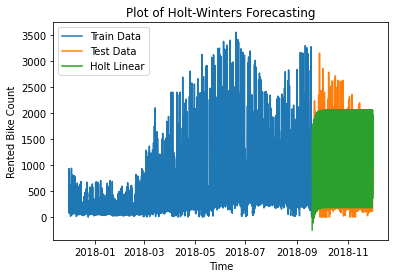

In [ ]:
import statsmodels.tsa.holtwinters as ets
holtt1=ets.ExponentialSmoothing(y_train,trend="add", seasonal = "add",initialization_method='known',
                               initial_level=y_train[-1],initial_trend=T[-1],initial_seasonal=S[-1],damped=True).fit()
#holtt=ets.ExponentialSmoothing(y_diff1).fit()
holtf1=holtt1.forecast(steps = len(y_test))
holtf1=pd.DataFrame(holtf1).set_index(y_test.index)

fig, ax= plt.subplots()
ax.plot(y_train, label = "Train Data")
ax.plot(y_test, label = "Test Data")
ax.plot(holtf1, label = "Holt Linear")
plt.title('Plot of Holt-Winters Forecasting')
plt.xlabel('Time')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.show()


### Calculating Mean Squared Error for forecast result

In [ ]:
holt1_mse=np.mean((y_test-holtf1[0])**2)
print('The Mean Squared Error for Holt-Winters Method with default parameters is:',holt1_mse)

The Mean Squared Error for Holt-Winters Method with default parameters is: 415917.86299160257


# Feature Selection

## Singular Value Decomposition

In [ ]:
x_mat=sm.add_constant(x_train).values
y_mat=np.array([y_train]).T
H=x_mat.T@x_mat
H_inv=la.inv(H)
u,s,vh=la.svd(H)
print(s)

[1.67889466e+10 1.07544586e+07 2.02663177e+06 7.55659998e+04
 9.05588864e+03 6.70936338e+03 2.72422158e+03 2.13747445e+03
 1.00130184e+03 6.71348581e+02 3.07805972e+02 2.33836640e+02
 9.21908378e+01 1.75452843e+01 1.16653764e-10]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**One low sigular values**

## Print the Condition Number

In [ ]:
print(f'The condition number for the data is {la.cond(x_train)}')

The condition number for the data is 67158.75586116938


**Condition Number is Large, colinearality exist in feature space**

## Backward Stepwise Regression

### OLS Regression

### Sqare root Transformation

Text(0, 0.5, 'Frequency')

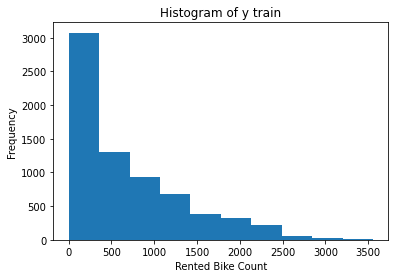

In [ ]:
plt.hist(y_train)
plt.title("Histogram of y train")
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

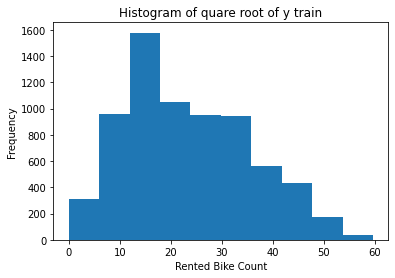

In [ ]:
plt.hist(np.sqrt(y_train))
plt.title("Histogram of quare root of y train")
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")

In [ ]:
#x_ols=sm.add_constant(x_train)
x_ols=x_train
ols_model=sm.OLS(np.sqrt(y_train),x_ols)
ols_result=ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     715.3
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:10:57   Log-Likelihood:                -24496.
No. Observations:                7008   AIC:                         4.902e+04
Df Residuals:                    6994   BIC:                         4.912e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Temperature(C)          

In [ ]:
ols_model1=sm.OLS(np.sqrt(y_train),x_ols.drop(columns=['Visibility (10m)']))
ols_result1=ols_model1.fit()
print(ols_result1.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     775.0
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:10:57   Log-Likelihood:                -24496.
No. Observations:                7008   AIC:                         4.902e+04
Df Residuals:                    6995   BIC:                         4.911e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Temperature(C)          

In [ ]:
ols_model2=sm.OLS(np.sqrt(y_train),x_ols.drop(columns=['Seasons_Winter','Visibility (10m)']))
ols_result2=ols_model2.fit()
print(ols_result2.summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              5753.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:57   Log-Likelihood:                         -24496.
No. Observations:                7008   AIC:                                  4.902e+04
Df Residuals:                    6996   BIC:                                  4.910e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
ols_model3=sm.OLS(np.sqrt(y_train),x_ols.drop(columns=['Seasons_Winter','Visibility (10m)','Seasons_Summer']))
ols_result3=ols_model3.fit()
print(ols_result3.summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              6274.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:57   Log-Likelihood:                         -24498.
No. Observations:                7008   AIC:                                  4.902e+04
Df Residuals:                    6997   BIC:                                  4.909e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
ols_model4=sm.OLS(np.sqrt(y_train),x_ols.drop(columns=['Seasons_Winter','Visibility (10m)',
                                                       'Seasons_Summer','Snowfall (cm)']))
ols_result4=ols_model4.fit()
print(ols_result4.summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              6895.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:57   Log-Likelihood:                         -24501.
No. Observations:                7008   AIC:                                  4.902e+04
Df Residuals:                    6998   BIC:                                  4.909e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
ols_model5=sm.OLS(np.sqrt(y_train),x_ols.drop(columns=['Seasons_Winter','Visibility (10m)',
                                                       'Seasons_Summer','Snowfall (cm)','Temperature(C)']))
ols_result5=ols_model5.fit()
print(ols_result5.summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              7479.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:57   Log-Likelihood:                         -24578.
No. Observations:                7008   AIC:                                  4.917e+04
Df Residuals:                    6999   BIC:                                  4.924e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

#### Not adding constant without squareroot transfromation

In [ ]:
#Not adding constant
x_ols=x_train
ols_model=sm.OLS(y_train,x_ols)
ols_result=ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     487.7
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:10:57   Log-Likelihood:                -53095.
No. Observations:                7008   AIC:                         1.062e+05
Df Residuals:                    6994   BIC:                         1.063e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Temperature(C)          

In [ ]:
ols_model1=sm.OLS(y_train,x_ols.drop(columns=['Seasons_Spring']))
ols_result1=ols_model1.fit()
print(ols_result1.summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              1642.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:57   Log-Likelihood:                         -53095.
No. Observations:                7008   AIC:                                  1.062e+05
Df Residuals:                    6995   BIC:                                  1.063e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
ols_model2=sm.OLS(y_train,x_ols.drop(columns=['Seasons_Spring','Visibility (10m)']))
ols_result2=ols_model2.fit()
print(ols_result2.summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              1779.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:58   Log-Likelihood:                         -53095.
No. Observations:                7008   AIC:                                  1.062e+05
Df Residuals:                    6996   BIC:                                  1.063e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
ols_model3=sm.OLS(y_train,x_ols.drop(columns=['Seasons_Spring','Visibility (10m)','Dew point temperature(C)']))
ols_result3=ols_model3.fit()
print(ols_result3.summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              1941.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:58   Log-Likelihood:                         -53095.
No. Observations:                7008   AIC:                                  1.062e+05
Df Residuals:                    6997   BIC:                                  1.063e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

#### Adding constant without transformation

In [ ]:
x_ols=sm.add_constant(x_train)
#x_ols=x_train
ols_model=sm.OLS(y_train,x_ols)
ols_result=ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     487.7
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:10:58   Log-Likelihood:                -53095.
No. Observations:                7008   AIC:                         1.062e+05
Df Residuals:                    6994   BIC:                         1.063e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**With the regression summary, we can see that Visibility has the highest p-value, indicating that it is not as significant to predict 'Rented Bike Count' as other features, so we want to drop it to reduced feature space.**

In [ ]:
ols_model1=sm.OLS(y_train,x_ols.drop(columns=['Visibility (10m)']))
ols_result1=ols_model1.fit()
print(ols_result1.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     528.4
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:10:58   Log-Likelihood:                -53095.
No. Observations:                7008   AIC:                         1.062e+05
Df Residuals:                    6995   BIC:                         1.063e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Drop Dew point temperature(C)**

In [ ]:
ols_model2=sm.OLS(y_train,x_ols.drop(columns=['Visibility (10m)','Dew point temperature(C)']))
ols_result2=ols_model2.fit()
print(ols_result2.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     576.5
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:10:58   Log-Likelihood:                -53095.
No. Observations:                7008   AIC:                         1.062e+05
Df Residuals:                    6996   BIC:                         1.063e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**Drop Seasons_Spring**

In [ ]:
ols_model3=sm.OLS(y_train,x_ols.drop(columns=['Visibility (10m)','Dew point temperature(C)','Seasons_Spring']))
ols_result3=ols_model3.fit()
print(ols_result3.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     576.5
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:10:58   Log-Likelihood:                -53095.
No. Observations:                7008   AIC:                         1.062e+05
Df Residuals:                    6996   BIC:                         1.063e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**The p-values for all the rest features are significantly small except for the constant, we will use this as the final model for OLS backward regression with constant added**

### VIF Regression

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_ols=x_train
ols_model=sm.OLS(np.sqrt(y_train),x_ols)
ols_result=ols_model.fit()
vif_result1=pd.DataFrame()
vif_result1['feature']=x_train.columns
vif_result1['VIF']=[variance_inflation_factor(x_train.values,i)
                    for i in  range(len(x_train.columns))]
print(ols_result.summary())
print(vif_result1)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     715.3
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:10:58   Log-Likelihood:                -24496.
No. Observations:                7008   AIC:                         4.902e+04
Df Residuals:                    6994   BIC:                         4.912e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Temperature(C)          

**Drop Season Summer**

In [ ]:
vif_result2=pd.DataFrame()
#x_vif=sm.add_constant(x_train)
x_vif=x_train
vif_result2['feature']=x_train.columns.drop('Seasons_Summer')
vif_result2['VIF']=[variance_inflation_factor(x_train.drop(columns=['Seasons_Summer']).values,i)
                    for i in  range(len(x_train.drop(columns=['Seasons_Summer']).columns))]

vif_model2=sm.OLS(np.sqrt(y_train),x_vif.drop(columns=['Seasons_Summer']))
vif_sum2=vif_model2.fit()
print(vif_sum2.summary())
print(vif_result2)

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              5308.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:58   Log-Likelihood:                         -24497.
No. Observations:                7008   AIC:                                  4.902e+04
Df Residuals:                    6995   BIC:                                  4.911e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

**Drop Functioning Day**

In [ ]:
vif_result3=pd.DataFrame()
vif_result3['feature']=x_train.columns.drop(['Seasons_Summer','Functioning Day'])
vif_result3['VIF']=[variance_inflation_factor(x_train.drop(columns=['Seasons_Summer','Functioning Day']).values,i)
                    for i in range(len(x_train.drop(columns=['Seasons_Summer','Functioning Day']).columns))]

vif_model3=sm.OLS(np.sqrt(y_train),x_vif.drop(columns=['Seasons_Summer','Functioning Day']))
vif_sum3=vif_model3.fit()
print(vif_sum3.summary())
print(vif_result3)

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              4891.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:58   Log-Likelihood:                         -25009.
No. Observations:                7008   AIC:                                  5.004e+04
Df Residuals:                    6996   BIC:                                  5.012e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

**Drop Temerature**

In [ ]:
vif_result4=pd.DataFrame()
vif_result4['feature']=x_train.columns.drop(['Seasons_Summer','Functioning Day','Dew point temperature(C)'])
vif_result4['VIF']=[variance_inflation_factor(x_train.drop(columns=['Seasons_Spring','Functioning Day','Dew point temperature(C)']).values,i)
                    for i in range(len(x_train.drop(columns=['Seasons_Spring','Functioning Day','Dew point temperature(C)']).columns))]

vif_model4=sm.OLS(np.sqrt(y_train),x_vif.drop(columns=['Seasons_Spring','Functioning Day','Dew point temperature(C)']))
vif_sum4=vif_model4.fit()
print(vif_sum4.summary())
print(vif_result4)

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              4750.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:59   Log-Likelihood:                         -25371.
No. Observations:                7008   AIC:                                  5.076e+04
Df Residuals:                    6997   BIC:                                  5.084e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

**Since the Adjusted R-square is decresing as we reduce more features, we will use the OLS with the highest Adjusted R-square value as the final model for VIF backward regression**

### Feature Selection Conclusion

In [ ]:
x_mat=x_ols
y_mat=np.array([y_train]).T
H=x_mat.T@x_mat
H_inv=la.inv(H)
u,s,vh=la.svd(H)
print(s)


[1.67889407e+10 1.07536266e+07 2.02657981e+06 7.53713649e+04
 9.05554349e+03 6.70890504e+03 2.72379623e+03 2.13742079e+03
 1.00120684e+03 6.71347101e+02 3.07544297e+02 2.33169074e+02
 8.74990172e+01 3.72235689e+00]


In [ ]:
x_ols.drop(columns=['Seasons_Winter','Visibility (10m)','Seasons_Summer','Snowfall (cm)']).columns

Index(['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Holiday', 'Functioning Day', 'Seasons_Autumn', 'Seasons_Spring'],
      dtype='object')

In [ ]:
x_ols.columns

Index(['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

**Comparing the results for backward regression feature selection based on the Adjusted R-square value, AIC and BIC, we choose the features 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Seasons_Autumn','Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter' as our features to fit linear regression on predicting Rents**

In [ ]:
x_mat=x_ols.drop(columns=['Seasons_Winter','Visibility (10m)','Seasons_Summer','Snowfall (cm)']).values
y_mat=np.array([y_train]).T
H=x_mat.T@x_mat
H_inv=la.inv(H)
u,s,vh=la.svd(H)
print(s)
x_new=x_ols.drop(columns=['Seasons_Winter','Visibility (10m)','Seasons_Summer','Snowfall (cm)'])

[2.83710196e+07 2.06539566e+06 2.29571216e+05 9.11868311e+03
 6.73239250e+03 2.95244619e+03 1.49047129e+03 3.77446625e+02
 2.91557855e+02 9.09455458e+01]


**We sucessfully get rid of the sigular values that are relavantly small, meaning that we have reduced collinearity within our feature space**

In [ ]:
print(f'The condition number for the data is {la.cond(x_new)}')

The condition number for the data is 558.530321926533


**The condition number for our feature matrix also decreases**

# Multiple Liner Regression

## Fit the mode

**Based on the features we selected, fit a Ordinary Lease Square Regression**

In [ ]:
ols_model=sm.OLS(np.sqrt(y_train),x_ols.drop(columns=['Seasons_Winter','Visibility (10m)',
                                                       'Seasons_Summer','Snowfall (cm)']))
ols_result=ols_model.fit()
print(ols_result.summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              6895.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:10:59   Log-Likelihood:                         -24501.
No. Observations:                7008   AIC:                                  4.902e+04
Df Residuals:                    6998   BIC:                                  4.909e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

## Compare Forecase result with test data

In [ ]:
ols_pred=ols_result.predict(x_test.drop(columns=['Seasons_Winter','Visibility (10m)',
                                                       'Seasons_Summer','Snowfall (cm)']))**2
ols_mse=np.mean((y_test-ols_pred)**2)
print("The mean squared error for multiple linear regression is :",ols_mse)

The mean squared error for multiple linear regression is : 231141.53409134952


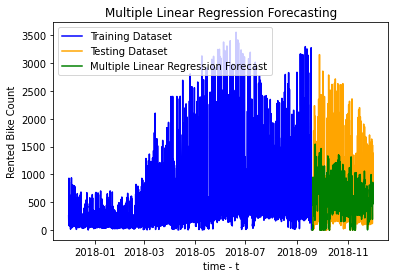

In [ ]:
plt.plot(y_train,color="blue",label="Training Dataset")
plt.plot(y_test,color="orange",label="Testing Dataset")
plt.plot(ols_pred,color="green",label="Multiple Linear Regression Forecast")
plt.legend()
plt.title("Multiple Linear Regression Forecasting")
plt.xlabel("time - t")
plt.ylabel("Rented Bike Count")
plt.show()

## Hypothesis Tests

### t-test

In [ ]:
#ols_result.t_test(x_test.drop(columns=['Visibility (10m)','Dew point temperature(C)','Seasons_Spring'])).shape
r = np.eye(len(ols_result.params))
tt=ols_result.t_test(r)
print(tt.summary())

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4981      0.040     12.476      0.000       0.420       0.576
c1            -0.2348      0.010    -23.634      0.000      -0.254      -0.215
c2             1.0975      0.099     11.045      0.000       0.903       1.292
c3             0.1915      0.041      4.682      0.000       0.111       0.272
c4            -1.3766      0.146     -9.445      0.000      -1.662      -1.091
c5            -1.3400      0.084    -15.959      0.000      -1.505      -1.175
c6            -3.4075      0.466     -7.311      0.000      -4.321      -2.494
c7            28.1798      0.834     33.781      0.000      26.544      29.815
c8             3.0899      0.414      7.472      0.000       2.279       3.901
c9             2.3038      0.212     10.856      0.0

### F-test

In [ ]:
ft=ols_result.f_test(np.identity(len(ols_result.params)))
print(ft.summary())

<F test: F=array([[6895.09043026]]), p=0.0, df_denom=7e+03, df_num=10>


**Since the p-value for our F-test is significantly small, we conclude that the included features in our linear regression contributes to better predict our independent variable**

## Evaluatation Values

In [ ]:
print("The AIC of this model is:",ols_result.aic)
print("The BIC of this model is:",ols_result.bic)
print("The Adjusted R-square of this model is:",ols_result.rsquared_adj)
print("The R-square of this model is:",ols_result.rsquared)
print("The RMSE of this model is:",ols_mse**0.5)

The AIC of this model is: 49022.09835500535
The BIC of this model is: 49090.646431331515
The Adjusted R-square of this model is: 0.9077274377511211
The R-square of this model is: 0.9078591052200835
The RMSE of this model is: 480.7718108326959


## ACF Residual

**Plot the ACF of Residual with a lag of 50**

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
<ipython-input-73-b9f5022790d8>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag,ryy)


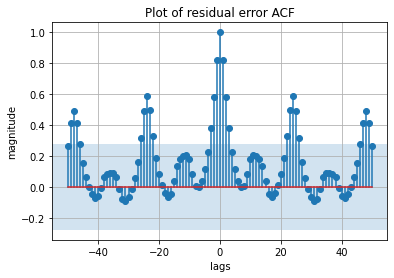

In [ ]:
ols_resid=ols_result.resid
n_lag=50
ry=list(sm.tsa.stattools.acf(ols_resid, nlags=n_lag))
ryy=ry[::-1][:-1]+ry
m=1.96/np.sqrt(n_lag)
lag=np.arange(-n_lag,n_lag+1,1)
plt.stem(lag,ryy)
plt.axhspan(-m,m,alpha=0.2)
plt.grid()
plt.xlabel("lags")
plt.ylabel("magnitude")
plt.title("Plot of residual error ACF")
plt.show()



## Q-value

In [ ]:

ols_qvalue=sm.stats.acorr_ljungbox(ols_resid,lags=[n_lag],return_df=True)
print(ols_qvalue)



         lb_stat  lb_pvalue
50  23475.221051        0.0


## Variane and Mean of Residual

In [ ]:
#Print Residual Variance and Mean
ols_pred_mean=np.mean(ols_resid)
ols_pred_var=np.var(ols_resid)

print("The Mean of Multiple Linear regression residual is {}, \nand the variance of Multiple Linear regression residual is {}"
      .format(ols_pred_mean,ols_pred_var))


The Mean of Multiple Linear regression residual is 0.0046182465970069685, 
and the variance of Multiple Linear regression residual is 63.715709815161446


# Base Models

## Average Method

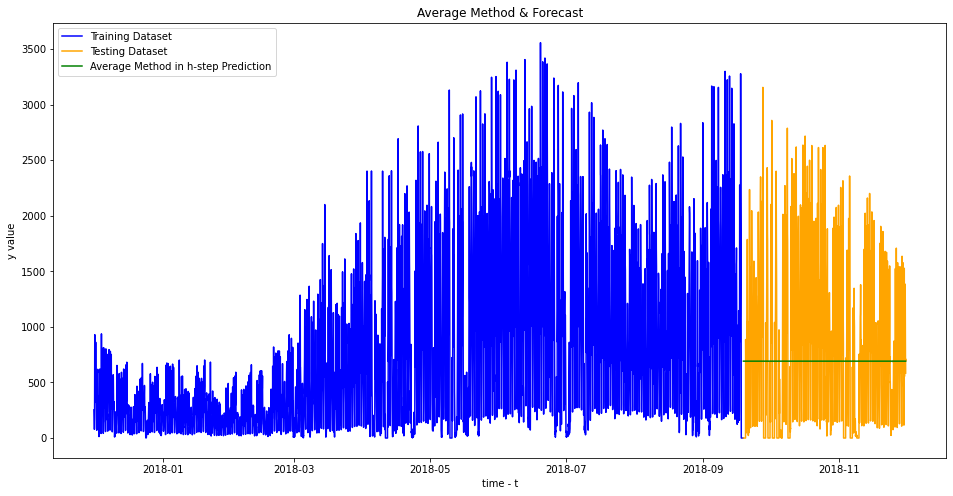

In [ ]:
def AverageForecast(y_train,y_test):
    y_train = y_train.tolist()
    y_test = y_test.tolist()
    train_pred = ['NA']
    for i in range(1,len(y_train)):
        train_pred.append(sum(y_train[:i])/i)
    train_error = np.array(y_train[2:])-np.array(train_pred[2:])
    test_pred = []
    for y in y_test:
        test_pred.append(np.mean(y_train))
    test_error = np.array(y_test[2:])-np.array(test_pred[2:])
    return train_pred,test_pred,train_error,test_error

avg_train_pred,avg_test_pred,avg_train_err,avg_test_err = AverageForecast(y_train,y_test)
plt.figure(figsize=(16,8))
plt.plot(y_train,color="blue",label="Training Dataset")
plt.plot(y_test,color="orange",label="Testing Dataset")
plt.plot(y_test.index,avg_test_pred,color="green",label="Average Method in h-step Prediction")
plt.legend()
plt.title("Average Method & Forecast")
plt.xlabel("time - t")
plt.ylabel("y value")
plt.show()
avg_mse=np.mean(avg_test_err**2)

In [ ]:
#print Residual Error and Forecast Error
avg_pred_mse=np.mean(avg_train_err**2)
avg_forecast_mse=np.mean(avg_test_err**2)
print(tabulate([["Prediction",avg_pred_mse],["Forecast",avg_forecast_mse]],headers=["Average Method MSE"]))
#Print Residual Variance and Forecast variance
avg_pred_var=np.var(avg_train_err)
avg_forecast_var=np.var(avg_test_err)
print("The variance of average method prediction error is {}, \nand the variance of average method forecast error is {}"
      .format(avg_pred_var,avg_forecast_var))

#Calculate Q-value
avg_qvalue=sm.stats.acorr_ljungbox(avg_train_err,lags=n_lag,return_df=True)
print(avg_qvalue.iloc[-1])

              Average Method MSE
----------  --------------------
Prediction                425314
Forecast                  380354
The variance of average method prediction error is 350042.0376689508, 
and the variance of average method forecast error is 375950.8170347755
lb_stat      41659.046595
lb_pvalue        0.000000
Name: 50, dtype: float64


## Naive Method

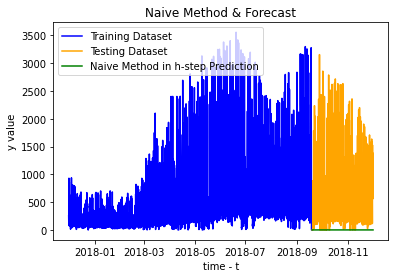

In [ ]:
def NaiveForecast(y_train,y_test):
    y_train = y_train.tolist()
    y_test = y_test.tolist()
    train_pred = ['NA']
    for i in range(1,len(y_train)):
        train_pred.append(y_train[i-1])
    train_error = np.array(y_train[2:])-np.array(train_pred[2:])
    test_pred = []
    for y in y_test:
        test_pred.append(y_train[-1])
    test_error = np.array(y_test[2:])-np.array(test_pred[2:])
    return train_pred,test_pred,train_error,test_error

naive_train_pred,naive_test_pred,naive_train_err,naive_test_err = NaiveForecast(y_train,y_test)
plt.plot(y_train,color="blue",label="Training Dataset")
plt.plot(y_test,color="orange",label="Testing Dataset")
plt.plot(y_test.index,naive_test_pred,color="green",label="Naive Method in h-step Prediction")
plt.legend()
plt.title("Naive Method & Forecast")
plt.xlabel("time - t")
plt.ylabel("y value")
plt.show()


In [ ]:
#Prediction and Forecast MSE
naive_pred_mse=np.mean(naive_train_err**2)
naive_forecast_mse=np.mean(naive_test_err**2)
print(tabulate([["Prediction",naive_pred_mse],["Forecast",naive_forecast_mse]],headers=["Naive Method MSE"]))

#Prediction and Forecast Variance
naive_pred_var=np.var(naive_train_err)
naive_forecast_var=np.var(naive_test_err)
print("The variance of naive method prediction error is {}, \nand the variance of naive method forecast error is {}"
      .format(naive_pred_var,naive_forecast_var))

#Q-value
naive_qvalue=sm.stats.acorr_ljungbox(naive_train_err,lags=n_lag,return_df=True)
print(naive_qvalue.iloc[-1])


              Naive Method MSE
----------  ------------------
Prediction             78039.1
Forecast              950306
The variance of naive method prediction error is 78039.08250927043, 
and the variance of naive method forecast error is 375950.8170347755
lb_stat      10011.550166
lb_pvalue        0.000000
Name: 50, dtype: float64


## Drift Method

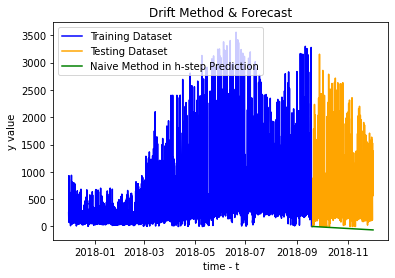

In [ ]:
def DriftForecast(y_train,y_test):
    y_train = y_train.tolist()
    y_test = y_test.tolist()
    train_pred = ['NA','NA']
    for i in range(2,len(y_train)):
        train_pred.append(y_train[i-1]+(y_train[i-1]-y_train[0])/(i-1))
    train_error = np.array(y_train[2:])-np.array(train_pred[2:])
    test_pred = []
    for j in range(1,len(y_test)+1):
        test_pred.append(y_train[-1]+j*(y_train[-1]-y_train[0])/(len(y_train)-1))
    test_error = np.array(y_test[2:])-np.array(test_pred[2:])
    return train_pred,test_pred,train_error,test_error

drift_train_pred,drift_test_pred,drift_train_err,drift_test_err = DriftForecast(y_train,y_test)
plt.plot(y_train,color="blue",label="Training Dataset")
plt.plot(y_test,color="orange",label="Testing Dataset")
plt.plot(y_test.index,drift_test_pred,color="green",label="Naive Method in h-step Prediction")
plt.legend()
plt.title("Drift Method & Forecast")
plt.xlabel("time - t")
plt.ylabel("y value")
plt.show()



In [ ]:
#Prediction and Forecast MSE
drift_pred_mse=np.mean(drift_train_err**2)
drift_forecast_mse=np.mean(drift_test_err**2)
print(tabulate([["Prediction",drift_pred_mse],["Forecast",drift_forecast_mse]],headers=["Drift Method MSE"]))

#Prediction and Forecast Variance
drift_pred_var=np.var(drift_train_err)
drift_forecast_var=np.var(drift_test_err)
print("The variance of drift method prediction error is {}, \nand the variance of drift method forecast error is {}"
      .format(drift_pred_var,drift_forecast_var))

#Q-value
drift_qvalue=sm.stats.acorr_ljungbox(drift_train_err,lags=n_lag,return_df=True)
print(drift_qvalue.iloc[-1])

              Drift Method MSE
----------  ------------------
Prediction             78075.3
Forecast              998324
The variance of drift method prediction error is 78075.30107904084, 
and the variance of drift method forecast error is 374742.92871840025
lb_stat      10007.75664
lb_pvalue        0.00000
Name: 50, dtype: float64


## Simple Exponential Smoothing Method

In [ ]:
def SimpleExponentialForecast(y_train,y_test,alpha,l0):
    y_train = y_train.tolist()
    y_test = y_test.tolist()
    train_pred = [l0]
    for i in range(1,len(y_train)):
        train_pred.append(alpha*y_train[i-1]+(1-alpha)*train_pred[i-1])
    train_error = np.array(y_train[2:])-np.array(train_pred[2:])
    test_pred = []
    for j in range(1,len(y_test)+1):
        test_pred.append(alpha*y_train[-1]+(1-alpha)*train_pred[-1])
    test_error = np.array(y_test[2:])-np.array(test_pred[2:])
    return train_pred,test_pred,train_error,test_error


### Tuning parameter for SES

In [ ]:
alpha_lst=[0.2,0.5,0.8]
l0_lst=[0,1000,1500]
sem_tab_index=[]
sem_mse_arr=np.zeros((len(alpha_lst)*len(l0_lst),2))
i=0
for al in range(len(alpha_lst)):
  for l in range(len(l0_lst)):
    sem_train_pred,sem_test_pred,sem_train_err,sem_test_err = SimpleExponentialForecast(y_train,y_test,alpha_lst[int(al)],l0_lst[l])
    sem_mse_arr[i]=[np.mean(sem_train_err**2),np.mean(sem_test_err**2)]
    sem_tab_index.append('alpha ='+str(alpha_lst[al])+', l0 ='+str(l0_lst[l]))
    i+=1
ses_tun_tab=pd.DataFrame(sem_mse_arr,index=sem_tab_index)
ses_tun_tab
print(tabulate(ses_tun_tab,headers=["Parameters", "Prediction MSE","Forecast MSE"]))

Parameters              Prediction MSE    Forecast MSE
--------------------  ----------------  --------------
alpha =0.2, l0 =0             204245            937353
alpha =0.2, l0 =1000          204318            937353
alpha =0.2, l0 =1500          204477            937353
alpha =0.5, l0 =0             121117            950306
alpha =0.5, l0 =1000          121130            950306
alpha =0.5, l0 =1500          121146            950306
alpha =0.8, l0 =0              88187.2          950306
alpha =0.8, l0 =1000           88188            950306
alpha =0.8, l0 =1500           88188.5          950306


**Alpha value of 0.8 and l0 value of 100 gives the lowest Prediction MSE as well as Forecase MSE among all parameters, we will graph it to see how it work**

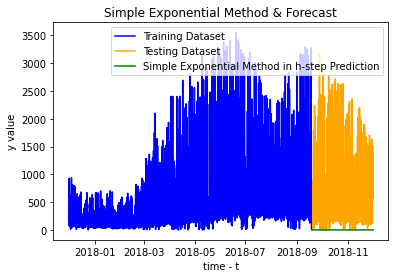

In [ ]:
alpha=0.8
l0=1000
sem_train_pred,sem_test_pred,sem_train_err,sem_test_err = SimpleExponentialForecast(y_train,y_test,alpha,l0)
plt.plot(y_train,color="blue",label="Training Dataset")
plt.plot(y_test,color="orange",label="Testing Dataset")
plt.plot(y_test.index,sem_test_pred,color="green",label="Simple Exponential Method in h-step Prediction")
plt.legend()
plt.title("Simple Exponential Method & Forecast")
plt.xlabel("time - t")
plt.ylabel("y value")
plt.show()


In [ ]:
#Prediction and Forecast MSE with alpha=0.8, l0=1000
sem_pred_mse=np.mean(sem_train_err**2)
sem_forecast_mse=np.mean(sem_test_err**2)
print(tabulate([["Prediction",sem_pred_mse],["Forecast",sem_forecast_mse]],headers=["Simple Exponential Method MSE"]))

#Prediction and Forecast Variance
sem_pred_var=np.var(sem_train_err)
sem_forecast_var=np.var(sem_test_err)
print("The variance of simple exponential method prediction error is {}, \nand the variance of simple exponential method forecast error is {}"
      .format(sem_pred_var,sem_forecast_var))

#Q-value
sem_qvalue=sm.stats.acorr_ljungbox(sem_train_err,lags=n_lag,return_df=True)
print(sem_qvalue.iloc[-1])



              Simple Exponential Method MSE
----------  -------------------------------
Prediction                            88188
Forecast                             950306
The variance of simple exponential method prediction error is 88187.95271318707, 
and the variance of simple exponential method forecast error is 375950.8170347755
lb_stat      12811.11899
lb_pvalue        0.00000
Name: 50, dtype: float64


# Time Series Modeling


## ARMA Model 

**Let's start with the original y test. Since we have already performed a ACF/PACF Analysis, ADF and KPSS test as well as Rolling Mean Variane Plots, we've observed that the data is non-stationary**

In [ ]:
def cal_GPAC(ry2,k_max,j_max):
    gpac=np.zeros((j_max+1,k_max))
    ry=ry2[:int((len(ry2)-1)/2)+1][::-1]
    for j in range(j_max+1):
        for k in range(1,k_max+1):
            if k==1:
                gpac[j,k-1]=ry[j+k]/ry[j]
            else:
                num=np.zeros((k,k))
                den=np.zeros((k,k))
                for n in range(k):
                    for m in range(k):
                        if m==k-1:
                            num[n,m]=ry[abs(j+n+1)]
                            den[n,m]=ry[abs(j-k+n+1)]
                        else:
                            num[n,m]=ry[abs(j+n-m)]
                            den[n,m]=ry[abs(j+n-m)]
                gpac[j,k-1]=la.det(num)/la.det(den)
    gpac_table=pd.DataFrame(gpac,columns=np.arange(1,k_max+1,1))
    return gpac_table


### ACF and PACF

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


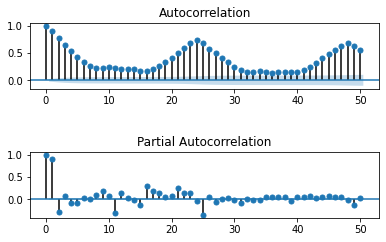

In [ ]:
ACF_PACF_Plot(y_train,50)

### GPAC Table

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


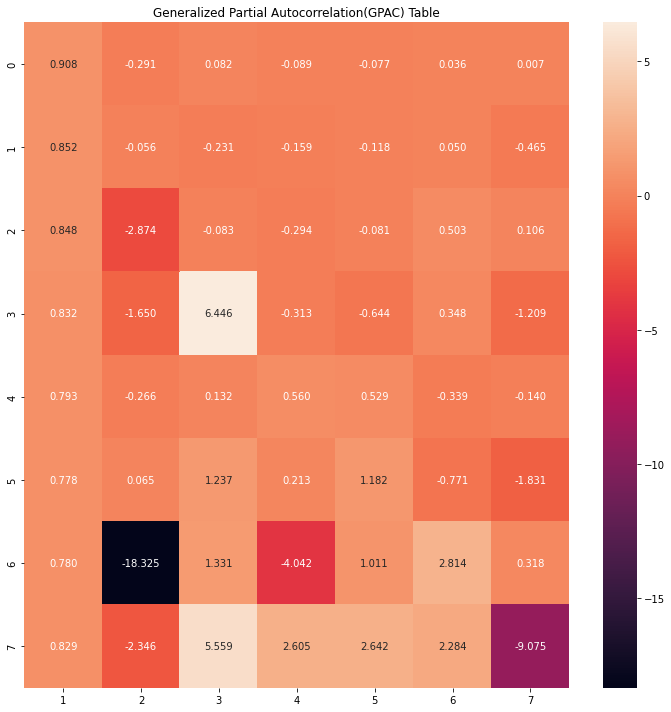

In [ ]:

ry=sm.tsa.stattools.acf(y_train, nlags=n_lag)
ry1 = ry[::-1]
ry2 = np.concatenate((ry1, ry[1:]))
gpac_table=cal_GPAC(ry2,7,7)
plt.figure(figsize=(10, 10))
sns.heatmap(gpac_table, annot=True, fmt=".3f")
plt.title("Generalized Partial Autocorrelation(GPAC) Table")
plt.tight_layout()
plt.show()

**The GPAC Table displays relavantly constant values at the first column, while a relavantly row of zeros occurs at row 0. Although this pattern is not strictly followed, we want to try fitting a model ARMA(1,0) to see how it performs.**

### Estimated Model with LM Algorithm

In [ ]:
def display_lm_result(model,na,nb):
  for i in range(1,na+1):
    print("The AR coefficient a{}".format(i),"is:",f"{model.params[i-1]:.3f}")
  for i in range(1,nb+1):
      print("The MA coefficient b{}".format(i),"is:",f"{model.params[i+na-1]:.3f}")
  print("\nThe standard error of the estimated coefficients are:\n",model.bse)
  print("\nThe Confidence intervals are\n",model.conf_int().values)


In [ ]:
na=1
nb=0
arma_model=sm.tsa.arima.ARIMA(y_train,order=(na,0,nb),trend='n').fit()
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                 7008
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -49340.134
Date:                Mon, 19 Dec 2022   AIC                          98684.268
Time:                        04:11:04   BIC                          98697.977
Sample:                    12-01-2017   HQIC                         98688.992
                         - 09-18-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9567      0.002    434.070      0.000       0.952       0.961
sigma2      7.634e+04    719.176    106.153      0.000    7.49e+04    7.78e+04
Ljung-Box (L1) (Q):                 401.11   Jarque-

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [ ]:
display_lm_result(arma_model,na,nb)

The AR coefficient a1 is: 0.957

The standard error of the estimated coefficients are:
 ar.L1       0.002204
sigma2    719.175952
dtype: float64

The Confidence intervals are
 [[9.52364039e-01 9.61003495e-01]
 [7.49333951e+04 7.77525131e+04]]


### Model Evaluation

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
<ipython-input-92-5cc40f587f02>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag,ryy)


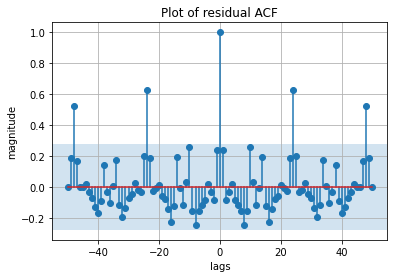

In [ ]:
arma_resid=y_train-arma_model.predict()
ry=list(sm.tsa.stattools.acf(arma_resid, nlags=n_lag))
ryy=ry[::-1][:-1]+ry
m=1.96/np.sqrt(n_lag)
lag=np.arange(-n_lag,n_lag+1,1)
plt.stem(lag,ryy)
plt.axhspan(-m,m,alpha=0.2)
plt.grid()
plt.xlabel("lags")
plt.ylabel("magnitude")
plt.title("Plot of residual ACF")
plt.show()


In [ ]:
arma_hat=arma_model.predict()
e=y_train-arma_hat
re=sm.tsa.stattools.acf(e, nlags=n_lag)
Q=len(y_test)*np.sum(np.square(re[n_lag:]))
DOF=n_lag-na-nb
alfa=0.01
chi_critical=chi2.ppf(1-alfa,DOF)

if Q<chi_critical:
    print("The residual is white")
else:
    print("The residual is NOT white")

The residual is white


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [ ]:
Q

0.0011585515720792623

## ARIMA Model

### ACF and PACF

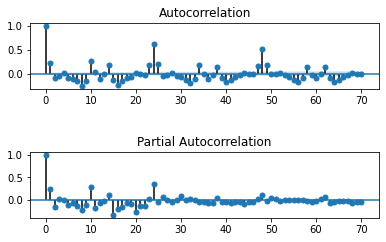

In [ ]:
y_diff1=y_train.diff()[1:]
ACF_PACF_Plot(y_diff1,70)


AR(1)24

### GPAC Table

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


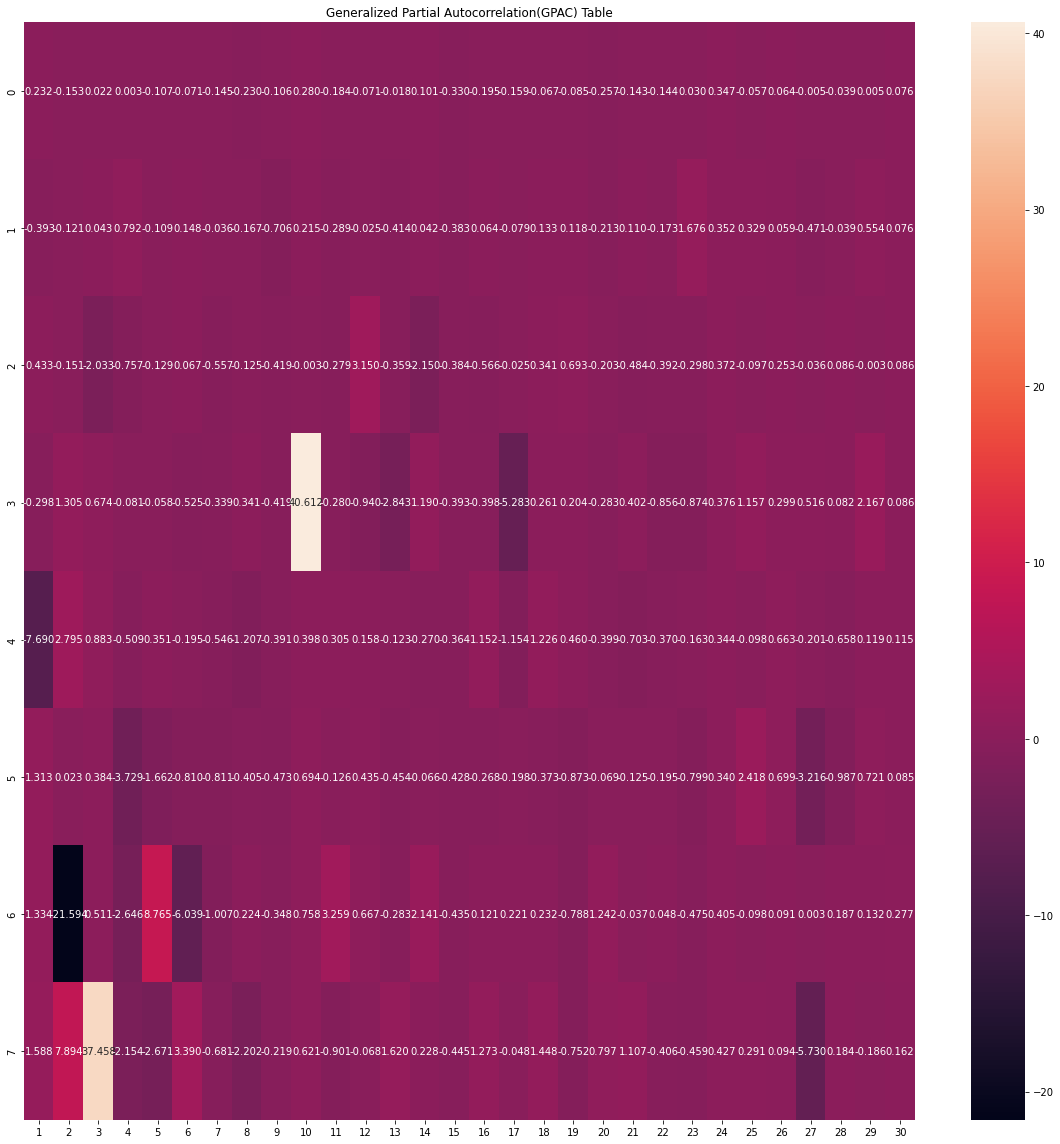

In [ ]:
ry=sm.tsa.stattools.acf(y_diff1, nlags=n_lag)
ry1 = ry[::-1]
ry2 = np.concatenate((ry1, ry[1:]))
gpac_table=cal_GPAC(ry2,30,7)
plt.figure(figsize=(16, 16))
sns.heatmap(gpac_table, annot=True, fmt=".3f")
plt.title("Generalized Partial Autocorrelation(GPAC) Table")
plt.tight_layout()
plt.show()

**The GPAC Table indicate that na of 24 might be a potential order for AR with nb of 0.. Although this pattern is not strictly followed, we want to try fitting a model ARIMA(24,1,0) to see how it performs.**

In [ ]:
na=24
nb=0
arima_model=sm.tsa.arima.ARIMA(y_train,order=(na,1,nb),trend='n').fit()
print(arima_model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                 7008
Model:                ARIMA(24, 1, 0)   Log Likelihood              -46794.280
Date:                Mon, 19 Dec 2022   AIC                          93638.560
Time:                        04:11:29   BIC                          93809.927
Sample:                    12-01-2017   HQIC                         93697.607
                         - 09-18-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1001      0.007     14.740      0.000       0.087       0.113
ar.L2         -0.1697      0.009    -17.959      0.000      -0.188      -0.151
ar.L3         -0.0721      0.011     -6.471      0.0

In [ ]:
display_lm_result(arima_model,na,nb)

The AR coefficient a1 is: 0.100
The AR coefficient a2 is: -0.170
The AR coefficient a3 is: -0.072
The AR coefficient a4 is: -0.115
The AR coefficient a5 is: -0.124
The AR coefficient a6 is: -0.113
The AR coefficient a7 is: -0.136
The AR coefficient a8 is: -0.192
The AR coefficient a9 is: -0.254
The AR coefficient a10 is: 0.154
The AR coefficient a11 is: -0.187
The AR coefficient a12 is: -0.110
The AR coefficient a13 is: -0.157
The AR coefficient a14 is: -0.009
The AR coefficient a15 is: -0.203
The AR coefficient a16 is: -0.134
The AR coefficient a17 is: -0.137
The AR coefficient a18 is: -0.076
The AR coefficient a19 is: -0.021
The AR coefficient a20 is: -0.185
The AR coefficient a21 is: -0.078
The AR coefficient a22 is: -0.070
The AR coefficient a23 is: -0.008
The AR coefficient a24 is: 0.349

The standard error of the estimated coefficients are:
 ar.L1       0.006792
ar.L2       0.009450
ar.L3       0.011136
ar.L4       0.012506
ar.L5       0.011037
ar.L6       0.010880
ar.L7       0.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
<ipython-input-99-a6f58b33b8af>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag,ryy)


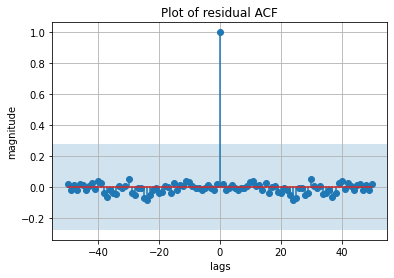

In [ ]:
arima_resid=y_train-arima_model.predict()
ry=list(sm.tsa.stattools.acf(arima_resid, nlags=n_lag))
ryy=ry[::-1][:-1]+ry
m=1.96/np.sqrt(n_lag)
lag=np.arange(-n_lag,n_lag+1,1)
plt.stem(lag,ryy)
plt.axhspan(-m,m,alpha=0.2)
plt.grid()
plt.xlabel("lags")
plt.ylabel("magnitude")
plt.title("Plot of residual ACF")
plt.show()


In [ ]:
arima_hat=arima_model.predict()
e=y_train-arima_hat
re=sm.tsa.stattools.acf(e, nlags=n_lag)
Q=len(y_test)*np.sum(np.square(re[n_lag:]))
DOF=n_lag-na-nb
alfa=0.01
chi_critical=chi2.ppf(1-alfa,DOF)

if Q<chi_critical:
    print("The residual is white")
else:
    print("The residual is NOT white")

The residual is white


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [ ]:
arima_qvalue=Q
print(Q)

0.7322901589573639


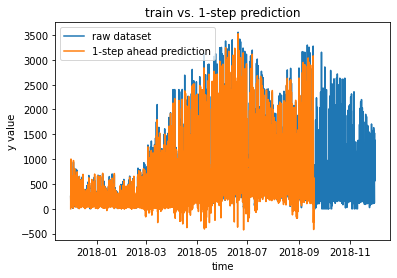

In [ ]:
plt.figure()
plt.plot(y,label='raw dataset')
plt.plot(arima_hat,label='1-step ahead prediction')
plt.title("train vs. 1-step prediction")
plt.xlabel("time")
plt.ylabel("y value")
plt.legend()
plt.show()

Variance of test versus prediction is : 600.8694568281904


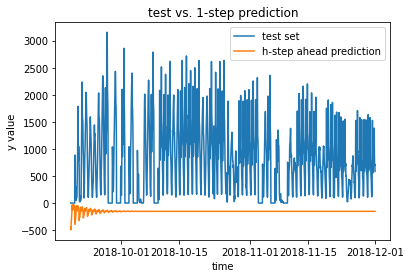

In [ ]:
arima_hat_h=arima_model.forecast(steps=len(y_test))
e_h=y_test[:-1]-arima_hat_h
print("Variance of test versus prediction is :",np.var(y_test)/np.var(arima_hat_h))
plt.figure()
plt.plot(y_test,label='test set')
plt.plot(arima_hat_h,label='h-step ahead prediction')
plt.title("test vs. 1-step prediction")
plt.xlabel("time")
plt.ylabel("y value")
plt.legend()
plt.show()

## SARIMA Model

### ACF and PACF

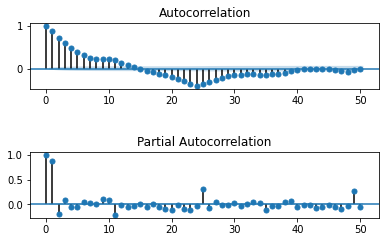

In [ ]:
s_period=24
y_sdiff=y_train.diff(periods=s_period)[s_period:]
ACF_PACF_Plot(y_sdiff,50)

**AR(1) X MA(1)24**

Non-seasonal part:(1,0,0)

Seasonal part:(0,1,1)24

ARMIMA(2,0,0)*ARIMA(0,1,1)24

### GPAC Table

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


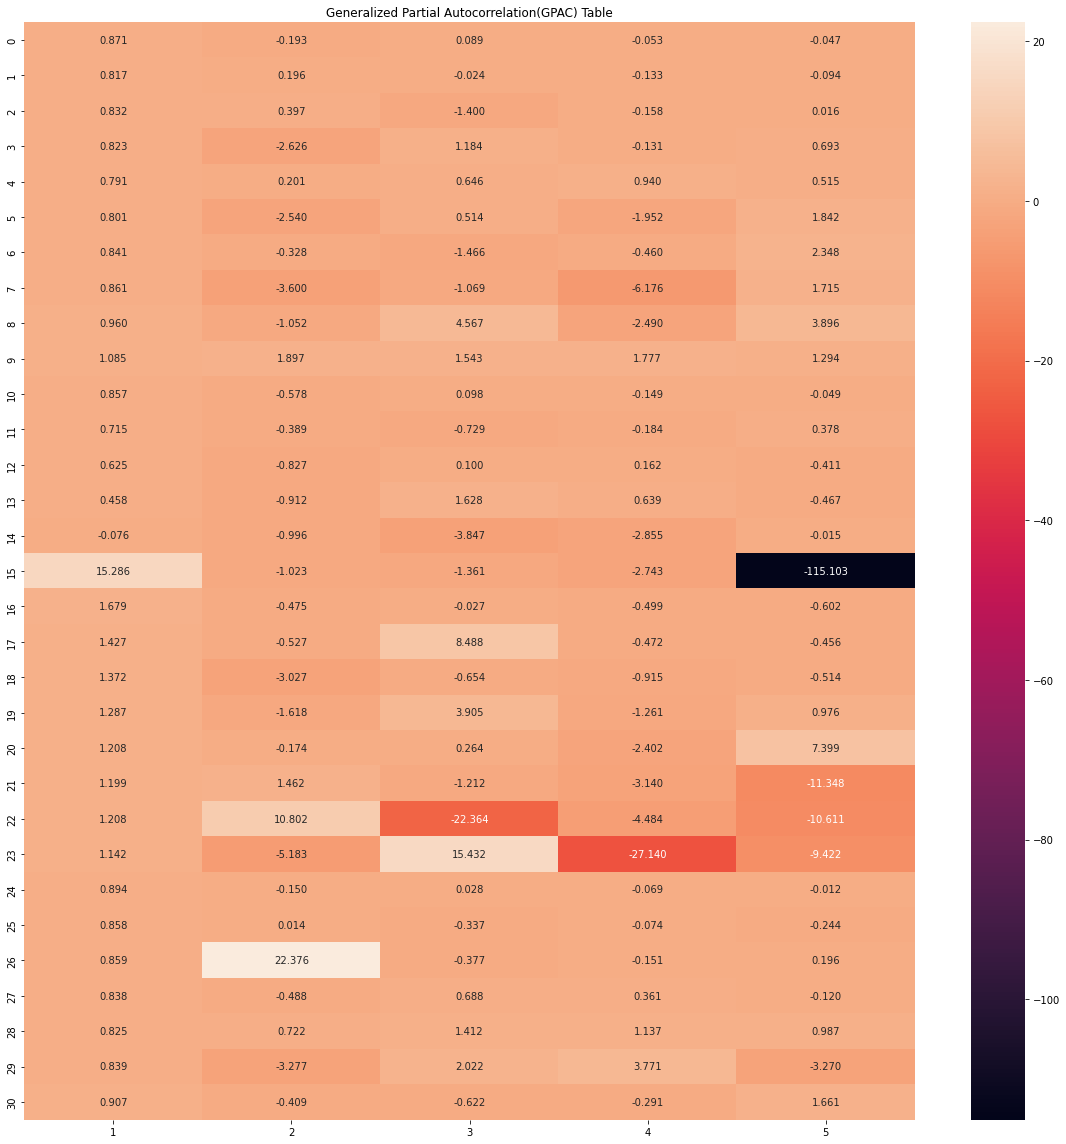

In [ ]:
ry=sm.tsa.stattools.acf(y_sdiff, nlags=n_lag)
ry1 = ry[::-1]
ry2 = np.concatenate((ry1, ry[1:]))
gpac_table=cal_GPAC(ry2,5,30)
plt.figure(figsize=(16, 16))
sns.heatmap(gpac_table, annot=True, fmt=".3f")
plt.title("Generalized Partial Autocorrelation(GPAC) Table")
plt.tight_layout()
plt.show()

In [ ]:
sarima_model=sm.tsa.SARIMAX(y_train,order=(2,0,0),seasonal_order=(0,1,1,24)).fit()
print(sarima_model.summary())


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                    Rented Bike Count   No. Observations:                 7008
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 24)   Log Likelihood              -46065.950
Date:                              Mon, 19 Dec 2022   AIC                          92139.899
Time:                                      04:12:16   BIC                          92167.305
Sample:                                  12-01-2017   HQIC                         92149.344
                                       - 09-18-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0637      0.006    175.797      0.000       1.052       1.076
ar.L2         -0.20

### Diagnostic Teset

In [ ]:
na=2
nb=1
display_lm_result(sarima_model,na,nb)

The AR coefficient a1 is: 1.064
The AR coefficient a2 is: -0.202
The MA coefficient b1 is: -0.940

The standard error of the estimated coefficients are:
 ar.L1         0.006051
ar.L2         0.007740
ma.S.L24      0.002383
sigma2      244.032348
dtype: float64

The Confidence intervals are
 [[ 1.05184824e+00  1.07556687e+00]
 [-2.17479492e-01 -1.87138349e-01]
 [-9.44406449e-01 -9.35066811e-01]
 [ 3.06803710e+04  3.16369602e+04]]


In [ ]:
print(f"The roots of denominator are {np.roots([1,1.064,-0.2022])}")
print(f"The roots of numerator are {np.roots([1,-0.940])}")

The roots of denominator are [-1.22858022  0.16458022]
The roots of numerator are [0.94]


### 1-step ahead prediction 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
<ipython-input-109-5e0f4cf61fc2>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag,ryy)


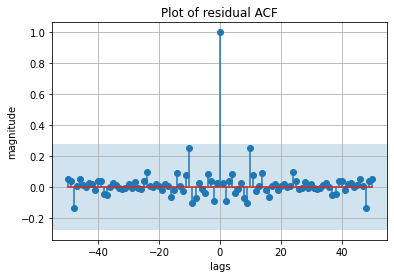

In [ ]:
sarima_resid=y_train-sarima_model.predict()
ry=list(sm.tsa.stattools.acf(sarima_resid, nlags=n_lag))
ryy=ry[::-1][:-1]+ry
m=1.96/np.sqrt(n_lag)
lag=np.arange(-n_lag,n_lag+1,1)
plt.stem(lag,ryy)
plt.axhspan(-m,m,alpha=0.2)
plt.grid()
plt.xlabel("lags")
plt.ylabel("magnitude")
plt.title("Plot of residual ACF")
plt.show()

In [ ]:
sarima_hat=sarima_model.predict(start=1,end=len(y_train)-1)
e=y_train[s_period:]-sarima_hat[-s_period]
re=list(sm.tsa.stattools.acf(e[1:-1], nlags=n_lag))
Q=len(y_sdiff)*np.sum(np.square(re[n_lag:]))
DOF=n_lag-na-nb
alfa=0.01
chi_critical=chi2.ppf(1-alfa,DOF)

if Q<chi_critical:
    print("The residual is white")
else:
    print("The residual is NOT white")


The residual is NOT white


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [ ]:
e

datetime
2017-12-02 00:00:00    -713.732043
2017-12-02 01:00:00    -733.732043
2017-12-02 02:00:00    -779.732043
2017-12-02 03:00:00    -874.732043
2017-12-02 04:00:00    -952.732043
                          ...     
2018-09-18 19:00:00   -1041.732043
2018-09-18 20:00:00   -1041.732043
2018-09-18 21:00:00   -1041.732043
2018-09-18 22:00:00   -1041.732043
2018-09-18 23:00:00   -1041.732043
Name: Rented Bike Count, Length: 6984, dtype: float64

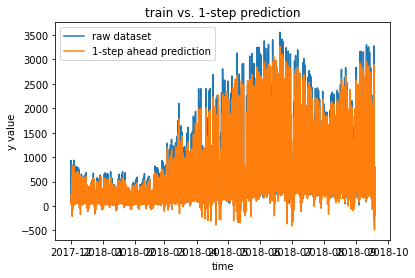

In [ ]:
plt.figure()
plt.plot(y_train,label='raw dataset')
plt.plot(sarima_hat,label='1-step ahead prediction')
plt.title("train vs. 1-step prediction")
plt.xlabel("time")
plt.ylabel("y value")
plt.legend()
plt.show()

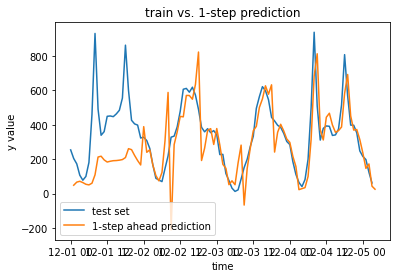

In [ ]:
plt.figure()
plt.plot(y_train[:100],label='test set')
plt.plot(sarima_hat[:100],label='1-step ahead prediction')
plt.title("train vs. 1-step prediction")
plt.xlabel("time")
plt.ylabel("y value")
plt.legend()
plt.show()



### h-step *prediction*

In [ ]:
sarima_hat_h=sarima_model.forecast(steps=len(y_test))
e_h=y_test[:-1]-sarima_hat_h
print("Variance of test versus prediction is :",np.var(y_test)/np.var(sarima_hat_h))
print("h-step prediction MSE is:",np.mean((y_test-e_h)**2))


Variance of test versus prediction is : 1.4713098647947327
h-step prediction MSE is: 1196676.801760145


 ar.L1         0.006381
ar.L2         0.008770
ma.S.L24      0.002339
sigma2      270.356754

Variance of test versus prediction is : 1.4713098647947327


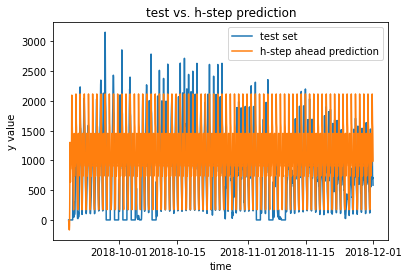

In [ ]:
sarima_hat_h=sarima_model.forecast(steps=len(y_test))

e_h=y_test[:-1]-sarima_hat_h
print("Variance of test versus prediction is :",np.var(y_test)/np.var(sarima_hat_h))
plt.figure()
plt.plot(y_test,label='test set')
plt.plot(sarima_hat_h,label='h-step ahead prediction')
plt.title("test vs. h-step prediction")
plt.xlabel("time")
plt.ylabel("y value")
plt.legend()
plt.show()

Variance of test versus prediction is : 1.4713098647947327


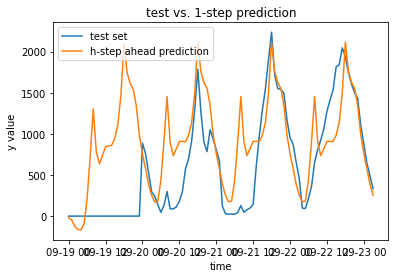

In [ ]:
sarima_hat_h=sarima_model.forecast(steps=len(y_test))

e_h=y_test[:-1]-sarima_hat_h
print("Variance of test versus prediction is :",np.var(y_test)/np.var(sarima_hat_h))
plt.figure()
plt.plot(y_test[:100],label='test set')
plt.plot(sarima_hat_h[:100],label='h-step ahead prediction')
plt.title("test vs. 1-step prediction")
plt.xlabel("time")
plt.ylabel("y value")
plt.legend()
plt.show()

## SARIMAX Model with Regressions

In [ ]:
x_train_sarimax=x_train.drop(columns=['Seasons_Winter','Visibility (10m)','Seasons_Summer','Snowfall (cm)'])
x_train_sarimax=x_train_sarimax.asfreq('H')
y_train_sarimax=y_train.asfreq('H')
sarimax_model=sm.tsa.SARIMAX(endog=np.sqrt(y_train_sarimax),exog=x_train_sarimax,order=(2,0,0),seasonal_order=(0,1,1,24),).fit()
print(sarimax_model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                    Rented Bike Count   No. Observations:                 7008
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 24)   Log Likelihood              -16879.066
Date:                              Mon, 19 Dec 2022   AIC                          33786.132
Time:                                      04:18:08   BIC                          33882.051
Sample:                                  12-01-2017   HQIC                         33819.188
                                       - 09-18-2018                                         
Covariance Type:                                opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Temperature(C)               0.3900      0.055      7.142      0.000  

In [ ]:
x_train_sarimax=x_train.drop(columns=['Seasons_Winter','Visibility (10m)','Seasons_Summer','Snowfall (cm)','Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Holiday','Seasons_Autumn','Seasons_Spring'])
x_train_sarimax=x_train_sarimax.asfreq('H')
y_train_sarimax=y_train.asfreq('H')
sarimax_model=sm.tsa.SARIMAX(endog=np.sqrt(y_train_sarimax),exog=x_train_sarimax,order=(2,0,0),seasonal_order=(0,1,1,24),).fit()
print(sarimax_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                    Rented Bike Count   No. Observations:                 7008
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 24)   Log Likelihood              -16882.190
Date:                              Mon, 19 Dec 2022   AIC                          33780.381
Time:                                      04:20:35   BIC                          33835.192
Sample:                                  12-01-2017   HQIC                         33799.270
                                       - 09-18-2018                                         
Covariance Type:                                opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temperature(C)       0.3256      0.041      8.037      0.000       0.246       0.405
H

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
<ipython-input-119-6b761ed63e5f>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag,ryy)


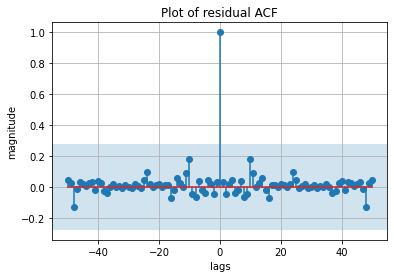

In [ ]:
sarimax_resid=np.sqrt(y_train)-sarimax_model.predict()
ry=list(sm.tsa.stattools.acf(sarimax_resid, nlags=n_lag))
ryy=ry[::-1][:-1]+ry
m=1.96/np.sqrt(n_lag)
lag=np.arange(-n_lag,n_lag+1,1)
plt.stem(lag,ryy)
plt.axhspan(-m,m,alpha=0.2)
plt.grid()
plt.xlabel("lags")
plt.ylabel("magnitude")
plt.title("Plot of residual ACF")
plt.show()

In [ ]:
sarimax_hat=sarimax_model.predict(start=1,end=len(y_train)-1)**2
#e=np.sqrt(y_train[s_period:])-sarimax_hat[-s_period]
re=ry
Q=len(y_train)*np.sum(np.square(re[n_lag:]))
DOF=n_lag-na-nb
alfa=0.01
chi_critical=chi2.ppf(1-alfa,DOF)

if Q<chi_critical:
    print("The residual is white")
else:
    print("The residual is NOT white")

The residual is white


In [ ]:
display_lm_result(sarimax_model,2,1)

The AR coefficient a1 is: 0.326
The AR coefficient a2 is: -0.044
The MA coefficient b1 is: 0.111

The standard error of the estimated coefficients are:
 Temperature(C)      0.040516
Humidity(%)         0.005427
Wind speed (m/s)    0.041257
Functioning Day     0.582520
ar.L1               0.006192
ar.L2               0.006985
ma.S.L24            0.002736
sigma2              0.059896
dtype: float64

The Confidence intervals are
 [[ 0.24621224  0.40503042]
 [-0.05421198 -0.03293927]
 [ 0.0298205   0.19154667]
 [25.13950644 27.42294185]
 [ 1.13253801  1.15680898]
 [-0.2765689  -0.2491882 ]
 [-0.96228036 -0.95155467]
 [ 7.18251408  7.4173015 ]]


In [ ]:
Q

13.330430969230111

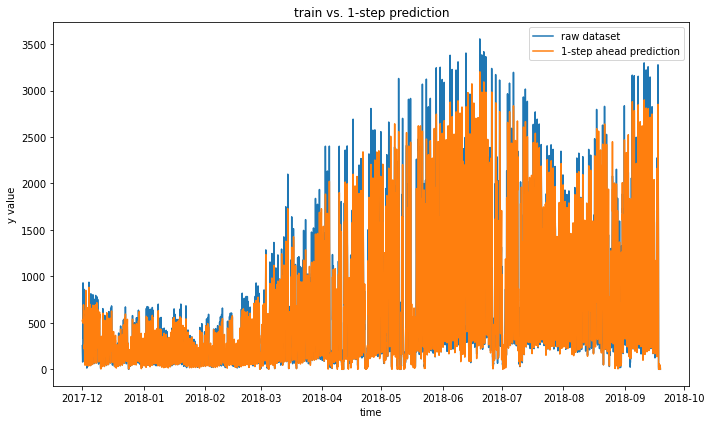

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_train,label='raw dataset')
plt.plot(sarimax_hat,label='1-step ahead prediction')
plt.title("train vs. 1-step prediction")
plt.xlabel("time")
plt.ylabel("y value")
plt.legend()
plt.tight_layout()
plt.show()

Variance of test versus prediction is : 1.979552677335831


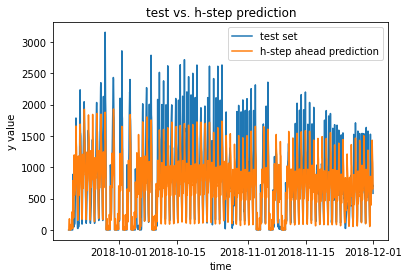

In [ ]:
sarimax_hat_h=sarimax_model.forecast(exog=x_test.drop(columns=['Seasons_Winter','Visibility (10m)','Seasons_Summer','Snowfall (cm)','Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Holiday','Seasons_Autumn','Seasons_Spring']),steps=len(y_test))**2
e_h=y_test[:-1]-sarimax_hat_h
print("Variance of test versus prediction is :",np.var(y_test)/np.var(sarimax_hat_h))
plt.figure()
plt.plot(y_test,label='test set')
plt.plot(sarimax_hat_h,label='h-step ahead prediction')
plt.title("test vs. h-step prediction")
plt.xlabel("time")
plt.ylabel("y value")
plt.legend()
plt.show()

## SARIMAX with trend

In [ ]:
x_train_sarimax2=x_train.drop(columns=['Seasons_Winter','Visibility (10m)','Seasons_Summer','Snowfall (cm)','Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Holiday','Seasons_Autumn','Seasons_Spring'])
x_train_sarimax2=x_train_sarimax2.asfreq('H')
y_train_sarimax2=y_train.asfreq('H')
sarimax_model2=sm.tsa.SARIMAX(endog=np.sqrt(y_train_sarimax),exog=x_train,trend='ct',order=(2,0,0),seasonal_order=(0,1,1,24),).fit()
print(sarimax_model2.summary())

In [ ]:
x_train_sarimax2=x_train.drop(columns=['Temperature(C)','Wind speed (m/s)','Snowfall (cm)','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter'])
x_train_sarimax2=x_train_sarimax2.asfreq('H')
y_train_sarimax2=y_train.asfreq('H')
sarimax_model2=sm.tsa.SARIMAX(endog=np.sqrt(y_train_sarimax),exog=x_train_sarimax2,trend='ct',order=(2,0,0),seasonal_order=(0,1,1,24),).fit()
print(sarimax_model2.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                    Rented Bike Count   No. Observations:                 7008
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 24)   Log Likelihood              -19312.285
Date:                              Mon, 19 Dec 2022   AIC                          38650.569
Time:                                      04:25:35   BIC                          38739.637
Sample:                                  12-01-2017   HQIC                         38681.264
                                       - 09-18-2018                                         
Covariance Type:                                opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                   -0.0128      0.082     -0.155      0.877  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
<ipython-input-129-59d44d470831>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag,ryy)


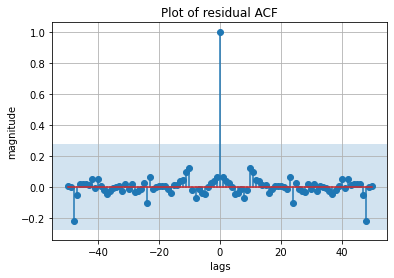

In [ ]:
sarimax_resid2=np.sqrt(y_train)-sarimax_model2.predict()
ry=list(sm.tsa.stattools.acf(sarimax_resid2, nlags=n_lag))
ryy=ry[::-1][:-1]+ry
m=1.96/np.sqrt(n_lag)
lag=np.arange(-n_lag,n_lag+1,1)
plt.stem(lag,ryy)
plt.axhspan(-m,m,alpha=0.2)
plt.grid()
plt.xlabel("lags")
plt.ylabel("magnitude")
plt.title("Plot of residual ACF")
plt.show()

In [ ]:
sarimax_hat2=sarimax_model2.predict(start=1,end=len(y_train)-1)**2
#e=np.sqrt(y_train[s_period:])-sarimax_hat[-s_period]
re=ry
Q=len(y_train)*np.sum(np.square(re[n_lag:]))
DOF=n_lag-na-nb
alfa=0.01
chi_critical=chi2.ppf(1-alfa,DOF)

if Q<chi_critical:
    print("The residual is white")
else:
    print("The residual is NOT white")

The residual is white


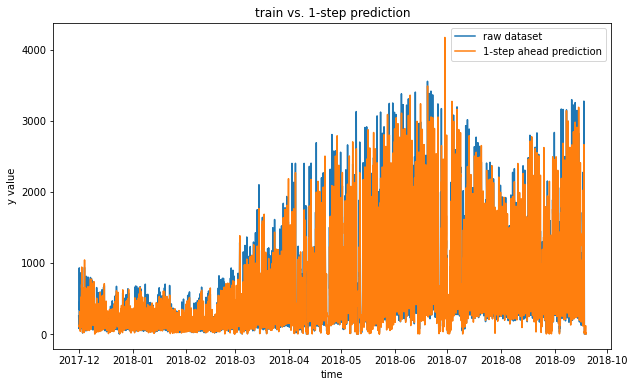

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_train,label='raw dataset')
plt.plot(sarimax_hat2,label='1-step ahead prediction')
plt.title("train vs. 1-step prediction")
plt.xlabel("time")
plt.ylabel("y value")
plt.legend()
plt.show()

Variance of test versus prediction is : 3.031581234275748


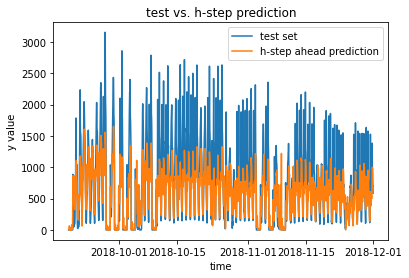

In [ ]:
#x_train_sarimax2=x_train.drop(columns=['Temperature(C)','Wind speed (m/s)','Snowfall (cm)','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter'])
sarimax_hat_h2=sarimax_model2.forecast(exog=x_test.drop(columns=['Temperature(C)','Wind speed (m/s)','Snowfall (cm)','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter']),steps=len(y_test))**2
#sarimax_hat_h2=sarimax_model2.forecast(exog=x_test,steps=len(y_test))**2
e_h=y_test[:-1]-sarimax_hat_h2
print("Variance of test versus prediction is :",np.var(y_test)/np.var(sarimax_hat_h2))
plt.figure()
plt.plot(y_test,label='test set')
plt.plot(sarimax_hat_h2,label='h-step ahead prediction')
plt.title("test vs. h-step prediction")
plt.xlabel("time")
plt.ylabel("y value")
plt.legend()
plt.show()

# Deep Learning Modeling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
DL = scaler.fit_transform(data)
DL=pd.DataFrame(DL,index=data.index,columns=data.columns)
y=DL['Rented Bike Count']
x=DL.drop(columns=['Rented Bike Count'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12,shuffle=False)


In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = np.array(x_train).reshape((x_train.shape[0], 1, x_train.shape[1]))
test_X = np.array(x_test).reshape((x_test.shape[0], 1, x_test.shape[1]))
print(train_X.shape, y_train.shape, test_X.shape, y_test.shape)

(7008, 1, 14) (7008,) (1752, 1, 14) (1752,)


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Epoch 1/50
98/98 - 11s - loss: 0.3760 - val_loss: 0.2818 - 11s/epoch - 109ms/step
Epoch 2/50
98/98 - 0s - loss: 0.2609 - val_loss: 0.2679 - 460ms/epoch - 5ms/step
Epoch 3/50
98/98 - 0s - loss: 0.2320 - val_loss: 0.2625 - 467ms/epoch - 5ms/step
Epoch 4/50
98/98 - 1s - loss: 0.2190 - val_loss: 0.2560 - 506ms/epoch - 5ms/step
Epoch 5/50
98/98 - 0s - loss: 0.2122 - val_loss: 0.2502 - 468ms/epoch - 5ms/step
Epoch 6/50
98/98 - 0s - loss: 0.2110 - val_loss: 0.2465 - 490ms/epoch - 5ms/step
Epoch 7/50
98/98 - 0s - loss: 0.2048 - val_loss: 0.2415 - 447ms/epoch - 5ms/step
Epoch 8/50
98/98 - 0s - loss: 0.2029 - val_loss: 0.2369 - 469ms/epoch - 5ms/step
Epoch 9/50
98/98 - 0s - loss: 0.2000 - val_loss: 0.2331 - 458ms/epoch - 5ms/step
Epoch 10/50
98/98 - 0s - loss: 0.1971 - val_loss: 0.2286 - 460ms/epoch - 5ms/step
Epoch 11/50
98/98 - 0s - loss: 0.1951 - val_loss: 0.2240 - 432ms/epoch - 4ms/step
Epoch 12/50
98/98 - 0s - loss: 0.1934 - val_loss: 0.2207 - 484ms/epoch - 5ms/step
Epoch 13/50
98/98 - 1s -

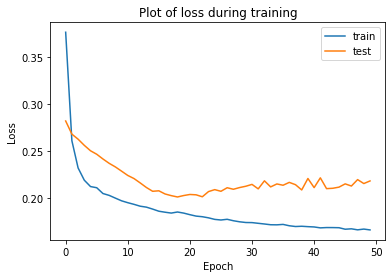

In [ ]:
history = model.fit(train_X, y_train, epochs=50, batch_size=72, validation_data=(test_X, y_test), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Plot of loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))


55/55 [==============================] - 1s 2ms/step


In [ ]:
np.concatenate((yhat, test_X[:, 1:]), axis=1).shape
y_test.shape

(1752,)

In [ ]:
inv_yhat = np.concatenate((yhat, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = np.array(y_test).reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.308


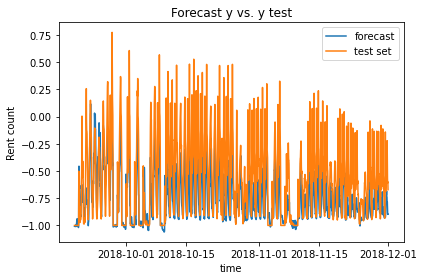

In [ ]:
plt.plot(x_test.index,yhat,label='forecast')
plt.plot(x_test.index,y_test,label='test set')
plt.title("Forecast y vs. y test")
plt.xlabel('time')
plt.ylabel('Rent count')
plt.legend()
plt.tight_layout()
plt.show()